In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

SCANS_FILE = "/Users/taylan/Desktop/LIDAR/docs/scans.json"
SCANS = []

with open(SCANS_FILE, "r") as f:
    payload = json.load(f)

    SCANS = payload.get("scans")

print("Loaded %s scans" % len(SCANS))

Loaded 18 scans


In [12]:
max_positions = []
points_per_scan = []

for s in SCANS:
    last_pos, _ = s.get("scans")[-1]
    
    max_positions.append(last_pos)
    points_per_scan.append(len(s.get("scans")))

MAX_POSITION = max(max_positions)
AVERAGE_MAX_POSITION = np.average(max_positions)
AVERAGE_POINTS = np.average(points_per_scan)

print("Max Position: %d" % MAX_POSITION)
print("Average Max Position: %d" % AVERAGE_MAX_POSITION)
print("Average Scans: %d" % AVERAGE_POINTS)

Max Position: 3623
Average Max Position: 3554
Average Scans: 275


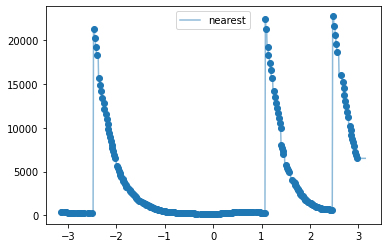

In [51]:
TOTAL_SAMPLES = 720

X_SPACE_DEGS = np.linspace(-math.pi, math.pi, TOTAL_SAMPLES)

def parse_scan(points):
    x_points = []
    y_points = []
    
    for pos, dist in points:
        if pos > MAX_POSITION:
            continue
        
        x_points.append(math.radians(360.0 * float(pos) / MAX_POSITION) - math.pi)
        y_points.append(dist)

    fig = plt.figure()
    ax = fig.subplots()
    
    f = interpolate.interp1d(x_points, y_points, kind="nearest", fill_value="extrapolate")
    y_interp = f(X_SPACE_DEGS)
    
    ax.plot(X_SPACE_DEGS, y_interp, alpha=0.5, label="nearest")
    ax.scatter(x_points, y_points)
    
    plt.legend()
    plt.show()

parse_scan(SCANS[10].get("scans"))

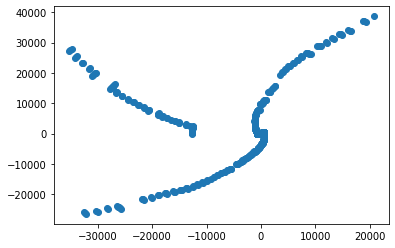

In [52]:
import math

CENTER_X = 0
CENTER_Y = 0
MAX_SCAN_SIZE_CM = 2000

X_SPACE_RADS = np.linspace(-math.pi, math.pi, TOTAL_SAMPLES)

def show_interpolated_scan(points):
    x_points = []
    y_points = []
    
    for pos, dist in points:
        if pos > MAX_POSITION:
            continue
        
        x_points.append(math.radians(360.0 * float(pos) / MAX_POSITION) - math.pi)
        y_points.append(dist)
    
    f = interpolate.interp1d(x_points, y_points, kind="nearest", fill_value="extrapolate")
    y_interp = f(X_SPACE_RADS)
    
    x_coords = []
    y_coords = []
    avg_radius = np.average(y_interp)
    
    for angle, dist in zip(X_SPACE_RADS, y_interp):
        radius = avg_radius * dist / MAX_SCAN_SIZE_CM
        
        x_coords.append(CENTER_X + radius * math.cos(angle))
        y_coords.append(CENTER_Y + radius * math.sin(angle))

    fig = plt.figure()
    ax = fig.subplots()
    
    ax.scatter(x_coords, y_coords)
    
    plt.show()

show_interpolated_scan(SCANS[10].get("scans"))